In [1]:
import pandas as pd

In [2]:
label_df = pd.read_csv("/home/kongge/projects/Phd/data/all_labels.csv")

In [3]:
correlation_matrix = label_df.drop('eid', axis=1).corr()

In [5]:
correlation_matrix

,Class_A00,Class_A01,Class_A02,Class_A03,Class_A04,Class_A05,Class_A06,Class_A07,Class_A08,Class_A09,...,Class_I48,Class_I63,Class_I10,Class_F00,Class_F20,Class_C50,Class_C18,Class_C56,Class_J45,Class_M05
Class_A00,1.000000,-0.000115,-0.000297,-0.000153,-0.000971,-0.000205,-0.000108,-0.000248,-0.000789,-0.001751,...,0.000578,-0.001414,-0.001041,-0.000702,-0.000352,-0.001446,0.001775,-0.000465,0.000410,-0.001199
Class_A01,-0.000115,1.000000,0.008639,-0.000330,0.000782,-0.000444,0.012453,0.005023,0.000056,0.004512,...,0.001028,-0.001040,0.001582,-0.001516,-0.000761,0.000825,0.000327,-0.001005,-0.003364,0.002115
Class_A02,-0.000297,0.008639,1.000000,-0.000848,0.018734,0.009292,0.004342,0.009453,0.005226,0.015167,...,0.001518,0.001178,0.005914,-0.002355,-0.000433,-0.000719,-0.000796,0.003197,0.003448,0.000218
Class_A03,-0.000153,-0.000330,-0.000848,1.000000,0.004844,-0.000587,-0.000310,0.003494,0.000407,0.004402,...,-0.001515,0.002052,-0.003556,-0.002005,-0.001007,0.002584,-0.000065,-0.001329,0.001372,0.000130
Class_A04,-0.000971,0.000782,0.018734,0.004844,1.000000,0.010025,0.002633,0.015661,0.045706,0.077405,...,0.035098,0.022664,0.035452,0.015683,0.001632,0.003082,0.012426,0.006968,0.018741,0.020166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Class_C50,-0.001446,0.000825,-0.000719,0.002584,0.003082,-0.002231,-0.001880,-0.000710,0.003313,0.016837,...,-0.006648,-0.006873,0.004142,0.002800,-0.002729,1.000000,0.000250,0.014216,0.007363,0.004603
Class_C18,0.001775,0.000327,-0.000796,-0.000065,0.012426,-0.001144,-0.000761,-0.000644,0.007395,0.046969,...,0.036322,0.010835,0.040875,0.001274,0.002468,0.000250,1.000000,0.009064,0.003712,0.000099
Class_C56,-0.000465,-0.001005,0.003197,-0.001329,0.006968,-0.000121,-0.000943,0.000614,0.001902,0.021328,...,-0.000736,0.002244,0.002673,-0.002663,-0.001120,0.014216,0.009064,1.000000,-0.001394,0.006555
Class_J45,0.000410,-0.003364,0.003448,0.001372,0.018741,0.002969,0.001208,0.001816,0.019303,0.041467,...,0.031511,0.014872,0.053281,0.004691,0.007206,0.007363,0.003712,-0.001394,1.000000,0.036459


In [6]:
threshold = correlation_matrix.where(lambda x: x != 1).stack().median()

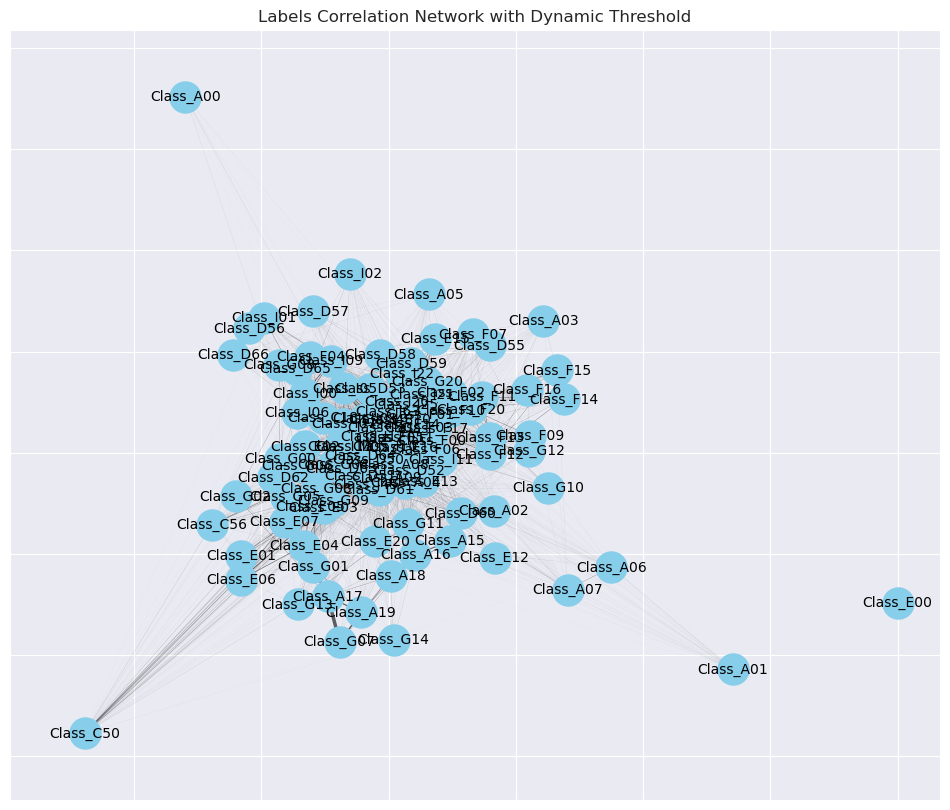

In [7]:
import networkx as nx
import matplotlib.pylab as plt
G = nx.Graph()

for column in correlation_matrix.columns:
    G.add_node(column)

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j], weight=corr_value)

plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G, weight='weight', seed=42)

edges = G.edges(data=True)
edge_widths = [abs(edge[2]['weight']) * 5 for edge in edges]  # 边宽与相关性成正比

nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

plt.title("Labels Correlation Network with Dynamic Threshold")
plt.show()